# 2020 Wellness Survey Analysis

As head of the Wellness Committee at my company, we are responsible for hosting weekly fitness classes, company-wide step challenges, maintaining the on-site gym, etc. Our goal is to provide our employees with as many wellness-related resources as possible, both physical and mental. To make sure we are providing the activities and resources that employees want, we send out an anonymous survey 1-2 times per year asking for feedback on our offerings.

The following 10 question survey was sent out at the beginning of 2020, asking for feedback on our 2019 offerings. In 2019, we offered 3 fitness classes per week (yoga, Pilates, bootcamp) and 2 step challenges, as well as several gym upgrades. 5 survey questions asked for simple rating responses while 5 were open-text responses. The questions were as follows:

1. On a scale of 1 through 5, please rate how much you enjoy the Step Challenges. If you do not participate please select N/A.
2. What can we do to improve the Step Challenges?
3. How satisfied are you with the Fit Lab classes? Please select N/A if you do not attend.
4. What could we do to improve the Fit Lab classes here?
5. How satisfied are you with the Pilates classes? Please select N/A if you do not attend.
6. What can we do to improve the Pilates classes here?
7. How satisfied are you with the Yoga classes? Please select N/A if you do not attend.
8. What could we do to improve the Yoga classes here?
9. How often do you use the Gym?
10. What can we do to improve the Gym?

In this project, I first present an overview of the ratings responses for the classes/step challenges/gym. I then use both natural language processing (NLP) and basic text analysis to take a deeper dive into the text responses and see what other information I can pull out.

### Data Import and Setup/Cleaning

Start with basic package imports:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

Read in data:

In [2]:
df = pd.read_excel('2020_Wellness_Survey.xlsx', skiprows = [1])
df.head()

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,First Name,Last Name,Custom Data 1,"On a scale of 1 through 5, please rate how much you enjoy the Step Challenges. If you do not participate please select N/A.",What can we do to improve the Step Challenges?,How satisfied are you with the Fit Lab classes? Please select N/A if you do not attend.,What could we do to improve the Fit Lab classes here?,How satisfied are you with the Pilates classes? Please select N/A if you do not attend.,What can we do to improve the Pilates classes here?,How satisfied are you with the Yoga classes? Please select N/A if you do not attend.,What could we do to improve the Yoga classes here?,How often do you use the Gym?,What can we do to improve the Gym?
0,11413624784,254096274,2020-03-12 11:24:56,2020-03-12 11:25:32,74.118.25.106,NaN,NaN,NaN,NaN,I really enjoy them,NaN,Very Satisfied,NaN,Very Satisfied,NaN,Very Satisfied,NaN,Frequently,Make it larger!
1,11404071123,254096274,2020-03-09 10:47:33,2020-03-09 10:48:28,74.118.25.106,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Never,NaN
2,11403856422,254096274,2020-03-09 09:38:19,2020-03-09 09:40:48,50.239.43.202,NaN,NaN,NaN,NaN,4,People need to be more engaged. I think a lot...,NaN,NaN,NaN,NaN,NaN,NaN,Never,"Nothing, i just don't have time to use it."
3,11399447700,254096274,2020-03-06 18:04:18,2020-03-06 18:05:46,67.185.157.6,NaN,NaN,NaN,NaN,4,Get the field more involved. Don't forget abo...,NaN,NaN,NaN,NaN,NaN,NaN,Never,Field Based...
4,11399081559,254096274,2020-03-06 15:18:22,2020-03-06 15:19:08,108.49.157.56,NaN,NaN,NaN,NaN,I really enjoy them,Keep the games coming!,4,More diversity in exercises,NaN,NaN,NaN,NaN,Sometimes,Option to play music?


None of the questions in the survey were "required responses," so it was up to the individual survey takers whether they chose to respond or not. I am therefore left with many `NaN`s, but I don't want to drop them as there is still plenty of useful information. There are, however, a bunch of columns that don't carry any useful information. I drop those here:

In [3]:
df = df.drop(['Collector ID', 'IP Address', 'Email Address',
              'First Name', 'Last Name', 'Custom Data 1'], axis = 1)
df.head()

,Respondent ID,Start Date,End Date,"On a scale of 1 through 5, please rate how much you enjoy the Step Challenges. If you do not participate please select N/A.",What can we do to improve the Step Challenges?,How satisfied are you with the Fit Lab classes? Please select N/A if you do not attend.,What could we do to improve the Fit Lab classes here?,How satisfied are you with the Pilates classes? Please select N/A if you do not attend.,What can we do to improve the Pilates classes here?,How satisfied are you with the Yoga classes? Please select N/A if you do not attend.,What could we do to improve the Yoga classes here?,How often do you use the Gym?,What can we do to improve the Gym?
0,11413624784,2020-03-12 11:24:56,2020-03-12 11:25:32,I really enjoy them,NaN,Very Satisfied,NaN,Very Satisfied,NaN,Very Satisfied,NaN,Frequently,Make it larger!
1,11404071123,2020-03-09 10:47:33,2020-03-09 10:48:28,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Never,NaN
2,11403856422,2020-03-09 09:38:19,2020-03-09 09:40:48,4,People need to be more engaged. I think a lot...,NaN,NaN,NaN,NaN,NaN,NaN,Never,"Nothing, i just don't have time to use it."
3,11399447700,2020-03-06 18:04:18,2020-03-06 18:05:46,4,Get the field more involved. Don't forget abo...,NaN,NaN,NaN,NaN,NaN,NaN,Never,Field Based...
4,11399081559,2020-03-06 15:18:22,2020-03-06 15:19:08,I really enjoy them,Keep the games coming!,4,More diversity in exercises,NaN,NaN,NaN,NaN,Sometimes,Option to play music?


Rename the columns for easier reference. Note the abbreviations:

**SC = Step Challenge**

**FL = Fit Lab (our equivalent of a bootcamp)**

**PI = Pilates**

**YO = Yoga**

In [4]:
df.columns = ['Respondent_ID',
              'Start_Date',
              'End_Date',
              'SC_Rating',
              'SC_Text',
              'FL_Rating',
              'FL_Text',
              'PI_Rating',
              'PI_Text',
              'YO_Rating',
              'YO_Text',
              'Gym_Use',
              'Gym_Text']

### Data Exploration/Analysis of Classes and Step Challenges

Let's see how many total responses were logged:

In [5]:
print('Total Responses: {}'.format(len(df)))

Total Responses: 104


I also want to ensure no one is taking the survey more than once and potentially swaying the results:

In [6]:
print('Duplicate IDs: {}'.format(df['Respondent_ID'].duplicated().sum()))

Duplicate IDs: 0


The following function prints out the ratings for each of the 3 classes and the step challenges. I wrap this into a function because, as you will see, not all of the ratings are actually logged as numerical. I will subsequently translate the non-numerical responses into equivalent numerical ratings so they can be appropriately analyzed:

In [7]:
def print_ratings(df):
    '''
    Prints out ratings for each class and step challenge
    '''
    print('--- Step Challenge Ratings ---\n{}'.format(df['SC_Rating'].
                                                        value_counts()))
    print('\n--- Fit Lab Ratings ---\n{}'.format(df['FL_Rating'].
                                                 value_counts()))
    print('\n--- Pilates Ratings ---\n{}'.format(df['PI_Rating'].
                                                 value_counts()))
    print('\n--- Yoga Ratings ---\n{}'.format(df['YO_Rating'].
                                              value_counts()))

In [8]:
print_ratings(df)

--- Step Challenge Ratings ---
I really enjoy them    33
4                      21
Neutral                10
Name: SC_Rating, dtype: int64

--- Fit Lab Ratings ---
Very Satisfied    14
Neutral            9
4                  9
Dissatisfied       2
Name: FL_Rating, dtype: int64

--- Pilates Ratings ---
Very Satisfied    16
Neutral            4
4                  4
Dissatisfied       1
Name: PI_Rating, dtype: int64

--- Yoga Ratings ---
Very Satisfied    11
4                  9
Neutral            4
2                  1
Name: YO_Rating, dtype: int64


This function translates any text-based responses into numerical ratings:

In [9]:
def text_to_num(df):
    '''
    Parameters
    ----------
    df : input dataframe
        Translates str (e.g. "Dissatisfied") to float (e.g. 1.0)

    Returns
    -------
    altered dataframe

    '''
    text_num_dict = {'I really enjoy them': 5,
                     'Very Satisfied': 5,
                     'Neutral': 3,
                     'Dissatisfied': 1}
    df['SC_Rating'] = df['SC_Rating'].apply(lambda x: text_num_dict[x]
                                            if x in text_num_dict else x)
    df['FL_Rating'] = df['FL_Rating'].apply(lambda x: text_num_dict[x]
                                            if x in text_num_dict else x)
    df['PI_Rating'] = df['PI_Rating'].apply(lambda x: text_num_dict[x]
                                            if x in text_num_dict else x)
    df['YO_Rating'] = df['YO_Rating'].apply(lambda x: text_num_dict[x]
                                            if x in text_num_dict else x)
    return df

Check the ratings again, after translating text-based responses:

In [10]:
df = text_to_num(df)
print_ratings(df)

--- Step Challenge Ratings ---
5.0    33
4.0    21
3.0    10
Name: SC_Rating, dtype: int64

--- Fit Lab Ratings ---
5.0    14
3.0     9
4.0     9
1.0     2
Name: FL_Rating, dtype: int64

--- Pilates Ratings ---
5.0    16
4.0     4
3.0     4
1.0     1
Name: PI_Rating, dtype: int64

--- Yoga Ratings ---
5.0    11
4.0     9
3.0     4
2.0     1
Name: YO_Rating, dtype: int64


Having translated all text ratings to numerical, I can now get summary statistics on the data:

In [11]:
df.describe()

,Respondent_ID,SC_Rating,FL_Rating,PI_Rating,YO_Rating
count,1.040000e+02,64.000000,34.000000,25.000000,25.000000
mean,1.137932e+10,4.359375,3.970588,4.360000,4.200000
std,1.167717e+07,0.742522,1.114241,1.036018,0.866025
min,1.134463e+10,3.000000,1.000000,1.000000,2.000000
25%,1.137297e+10,4.000000,3.000000,4.000000,4.000000
50%,1.137310e+10,5.000000,4.000000,5.000000,4.000000
75%,1.138150e+10,5.000000,5.000000,5.000000,5.000000
max,1.141362e+10,5.000000,5.000000,5.000000,5.000000


Let's visualize the average ratings to see how the classes compare:

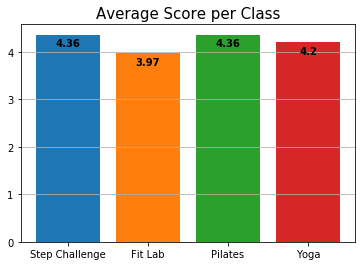

In [12]:
fig, ax = plt.subplots()
ax.bar('Step Challenge', df['SC_Rating'].mean())
ax.bar('Fit Lab', df['FL_Rating'].mean())
ax.bar('Pilates', df['PI_Rating'].mean())
ax.bar('Yoga', df['YO_Rating'].mean())
ax.grid(axis = 'y', which = 'both')

for i, v in enumerate(df[['SC_Rating', 'FL_Rating',
                          'PI_Rating', 'YO_Rating']].mean()):
    ax.text(i,
            v - .25,
            str(round(v, 2)),
            ha = 'center',
            fontsize = 10,
            fontweight = 'bold')

ax.set_title('Average Score per Class', fontsize = 15)
plt.show()

It's always nice to receive positive feedback, but by taking a look at the negative feedback, we can find areas for improvement. The following function allows the input of any of the class abbreviations and a maximum score (e.g. "I want to look at all scores less than or equal to 3 for the Pilates class"). It will then print the text-based responses associated with those ratings.

In [13]:
def low_scores(df, class_abbrev, score):
    '''
    Parameters
    ----------
    df: input dataframe
    class_abbrev : str, SC / FL / PI / YO
    score: int, max score to look at
        Prints out low scores and associated text.

    Returns
    -------
    None.

    '''
    rating_string = class_abbrev + '_Rating'
    text_string = class_abbrev + '_Text'
    print('{} | {}'.format(rating_string, text_string))
    low_ratings = df[df[rating_string] <= score]\
                     [[rating_string, text_string]].dropna()
    for entry in low_ratings.values:
        print('Rating: {} | Comment: {}'.format(int(entry[0]), entry[1]))
    print()

I now feed each of the classes and the step challenge into the previous function, looking at all text responses for a rating of less than or equal to 3.

In [14]:
for i in ['SC', 'FL', 'PI', 'YO']:
    low_scores(df, i, 3)

SC_Rating | SC_Text
Rating: 3 | Comment: Lunch walking groups
Rating: 3 | Comment: I need to learn more about them. Download the app but not sure exactly how to use interpret.
Rating: 3 | Comment: Maybe more rewards and group walking sessions
Rating: 3 | Comment: Promote them more prior to the start
Rating: 3 | Comment: More prize

FL_Rating | FL_Text
Rating: 1 | Comment: fit lab classes should be flexible hours not during end of the day. May be mornings or 3 p.m. afternoon
Rating: 3 | Comment: they should start at 5!
Rating: 3 | Comment: Please try to include afternoon sessions
Rating: 3 | Comment: Offer more of them earlier in the day.
Rating: 3 | Comment: Nothing
Rating: 3 | Comment: courtesy notice across the company not schedule meetings during the fitness classes so more people can attend
Rating: 1 | Comment: Not good time
Rating: 3 | Comment: Different time options

PI_Rating | PI_Text
Rating: 3 | Comment: they should start at 5!
Rating: 3 | Comment: 2days in a week
Rating: 1 | 

There is some really good feedback here. Class feedback seems to mostly revolve around the timing of the classes. As a committee, we have explored many different time slots for the classes over the years - it's a definite challenge to try to accommodate the schedules of an entire company. We settled on the current schedule about a year ago because we found it regularly received the highest attendance, but it may be time to revisit the class times.

I also really like the step challenge responses. It looks like people would appreciate more coordinated walking groups. That is definitely something we can promote for out next challenge!

### Natural Language Processing and Text Analysis of Gym

I will now take a deeper dive into our on-site gym. Let's start by seeing how many people actually gave feedback on the gym:

In [15]:
print('Gym feedback count: {}'.format(df['Gym_Text'].notna().sum()))

Gym feedback count: 58


What this shows is that out of 104 total responses to the survey, 58 included comments related to the gym. That's not a huge volume, but should ideally be enough to give me an overall idea of how the gym is being received.

### Latent Dirichlet Allocation

The next function performs Latent Dirichlet Allocation (LDA) on any of the classes or the gym. LDA is a type of Natural Language Processing (NLP) that groups words which appear frequently together in a set of documents. Note that a "document" is any item in a corpus, so in this case I am treating each text response as a "document".

The idea behind LDA is that these frequently occuring words represent smaller "topics". By finding groups of smaller topics that occur frequently together, we can build an idea of a larger "topic". An example would be documents that include the words "bark", "puppy" and "leash" would fall into the topic of "dogs". It's important to note that these are not clearly defined topics and require background knowledge and interpretation by the user.

This function also allows the user to define how many topics they would like to explore.

In [16]:
def perform_LDA(df, class_abbrev, num_topics):
    '''
    Parameters
    ----------
    df: input dataframe
    class_abbrev: str, SC / FL / PI / YO / Gym
    num_topics: int, number of topics to model
        Runs LDA on class_abbrev text.
        
    Returns
    -------
    None.

    '''
    text_string = class_abbrev + '_Text'
    count_vec = CountVectorizer(stop_words = 'english')
    doc_term_matrix = count_vec.fit_transform(df[text_string].
                                              values.astype('U'))
    print('Number of different words used across all responses: {}'.\
          format(doc_term_matrix.shape[1]))
    
    # Fit number of different topics
    LDA = LatentDirichletAllocation(n_components = num_topics,
                                    random_state = 42)
    LDA.fit(doc_term_matrix)
    
    # Check top 10 words in order for each topic
    for i, topic_num in enumerate(LDA.components_):
        print('\n--- Topic {} - Top 10 Words ---'.format(i + 1))
        print([count_vec.get_feature_names()[j]
               for j in LDA.components_[i].argsort()[-10:][::-1]])

In [17]:
perform_LDA(df, 'Gym', 3)

Number of different words used across all responses: 201

--- Topic 1 - Top 10 Words ---
['gym', 'space', 'great', 'equipment', 'room', 'elliptical', 'ventilation', 'think', 'bigger', 'better']

--- Topic 2 - Top 10 Words ---
['nan', 'space', 'larger', 'bigger', 'room', 'use', 'gym', 'nice', 'add', 'time']

--- Topic 3 - Top 10 Words ---
['gym', 'like', 'weights', 'dirty', 'exercises', 'machines', 'make', 'provide', 'need', 'free']


With only 58 text responses, I don't have a huge corpus to sort through. But by looking at the top 10 words in each of 3 topics, I can start to piece together people's feelings on our gym. Topics 1 and 2 both seem to relate to the size of the gym - that's certainly been a common piece of feedback for our committee. Topic 3 is a bit more ambiguous, but with reference to "dirty" in topic 3 and "ventilation" in topic 1, I'd also like to explore people's responses related to cleanliness.

The `word_analysis` function below allows the user to input any list of words they want to explore as they relate to a class or the gym. Based on the topics above, I am going to look at words related to the size/space and cleanliness of the gym.

In [18]:
def word_analysis(df, class_abbrev, text_list):
    '''
    Parameters
    ----------
    df : input dataframe
    class_abbrev : str, SC / FL / PI / YO
    text_list: list-like, list of words to include
        Prints comments for class_abbrev that include text_list.

    Returns
    -------
    None.

    '''
    text_string = class_abbrev + '_Text'
    text_ser = pd.Series(dtype = 'str')
    for word in text_list:
        text_ser = text_ser.append(
            df[df[text_string].str.contains(word,
                                            na = False,
                                            case = False)][text_string])
    text_ser = text_ser.drop_duplicates().reset_index(drop = True)
    print('--- {} Responses Which Include {} ---\n'.format(class_abbrev,
                                                           text_list))
    _ = [print(str(i) + '. ' + str(j)) for i, j in
         enumerate(text_ser.values, 1)]
    print('\n--- {} out of {} comments mention {} ---'.\
          format(len(text_ser), df[text_string].notna().sum(), text_list))

In [19]:
word_analysis(df, 'Gym', ['space', 'big', 'large', 'room'])

--- Gym Responses Which Include ['space', 'big', 'large', 'room'] ---

1. The location. Location with a window and bigger space. I would feel weird being in there with more than one person.   Ventilation - to avoid sweaty, stale air   Up to date and clean equipment
2. More space!!!
3. larger space would be better as I felt claustrophobic when I worked out in there once.
4. Bigger space.
5. More space
6. Dedicate more space and relocate it to space where there are windows.  A bit more equipment would be nice.
7. Larger space. More weights.
8. Create more "free" space instead of cramming up with instruments.
9. make the space bigger and have better ventilation.  also, a second elliptical would be AWESOME and very much appreciated.  I personally love the ARC trainer elliptical.  The equipment at the gym is really great and I love that we have this resource.  Also, maybe a water source in the room?   Thanks for providing such a great space!!!
10. It should be larger and well vented. I beli

Of the 58 comments people made out the gym, 24 of them made reference to wanting more space! I am not sure of the logistics of physically moving the gym at this point in time, but it's still really good feedback. As our company continues to grow, it will certainly be worth looking at expanding the current gym space or moving it to a larger facility.

In [20]:
word_analysis(df, 'Gym', ['vent', 'dirt', 'sweat', 'clean'])

--- Gym Responses Which Include ['vent', 'dirt', 'sweat', 'clean'] ---

1. The location. Location with a window and bigger space. I would feel weird being in there with more than one person.   Ventilation - to avoid sweaty, stale air   Up to date and clean equipment
2. Ventilation
3. make the space bigger and have better ventilation.  also, a second elliptical would be AWESOME and very much appreciated.  I personally love the ARC trainer elliptical.  The equipment at the gym is really great and I love that we have this resource.  Also, maybe a water source in the room?   Thanks for providing such a great space!!!
4. It should be larger and well vented. I believe 167 has more space to be converted in a nice GYM
5. I would appreciate women showers to be cleaned more often and for team members not to leave their dirty items in the shower along with their dirty gym wear.  I feel it is a huge health hazard.  Dirty to a point that I don't want to use gym facilities any more!  This has been c

By looking at words specifically related to the ventilation and cleanliness of the gym, it's pretty obvious there is not enough ventilation in the current setup. That is another common piece of feedback we receive based on the design of the room - there is only one door, and as previously mentioned, the space is not very large. It's unfortunately not difficult to imagine there is poor ventilation with only one way for air to go in and out of the space. This is something we can discuss further as a committee.

### Summary

Based on this feedback, it seems like the committee is overall doing well. Classes are generally well liked, the gym sees decent use, and many people love the step challenges. We have some clear areas of improvement for our gym and will definitely reconsider the timing of the fitness classes.

In performing this analysis, I have to remember that there is a definite case of selection bias here. Not only was this survey entirely voluntary, but any employee can choose come to our fitness classes or use our gym. It would therefore make sense that only people who actually *enjoy* going would continue to attend and have an actual response to this survey. One of the larger, on-going challenges we will always face as a committee is trying to improve attendance at classes and participation in step challenges. In order to get an idea of how we could do that, we would need to run a separate survey and encourage non-attendees to respond. That is something we can and should explore in our next survey.